5


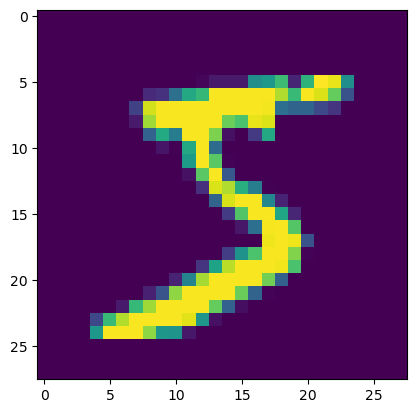

In [2]:
import tensorflow as tf
import keras as kr
from keras import Sequential
from keras.layers import Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt

mnist = kr.datasets.mnist
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [72]:
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

model = Sequential([Input(shape=(28, 28)),
                    Flatten(),
                    Dense(128, activation=tf.nn.relu),
                    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf._optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8951 - loss: 0.3700
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9126 - loss: 0.3141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9121 - loss: 0.3181
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9118 - loss: 0.3304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9103 - loss: 0.3362


In [64]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras as kr
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D

tfds.list_builders()
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

In [ ]:
(train_images, train_labels),(test_images, test_labels) = tfds.as_numpy(tfds.load('mnist', 
                                                                                   split= ['train', 'test'], batch_size=-1, as_supervised=True))

model = kr.Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'), 
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2), 
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=kr.optimizers.RMSprop(), loss=kr.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=50, epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8872 - loss: 1.0290
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9549 - loss: 0.6574
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9600 - loss: 1.7689
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9599 - loss: 7.5283
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9571 - loss: 37.2905


In [66]:
model.evaluate(test_images, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9691 - loss: 55.5239


[55.52391815185547, 0.9690999984741211]

In [67]:
mnist = kr.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images/ 255.0
testing_images = testing_images / 255.0
models = Sequential([Input(shape=(28,28)),
    Flatten(),                
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

models.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
models.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8967 - loss: 0.3663
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9137 - loss: 0.3125
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9118 - loss: 0.3201
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9120 - loss: 0.3297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9085 - loss: 0.3417


In [69]:
models.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9266 - loss: 0.2720
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9265 - loss: 0.2697
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9238 - loss: 0.2768
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9222 - loss: 0.2826
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9202 - loss: 0.2888
